## 4.1 데이터에서 학습한다! 

### 4.1.1 데이터주도 학습

#### 3가지 방법론
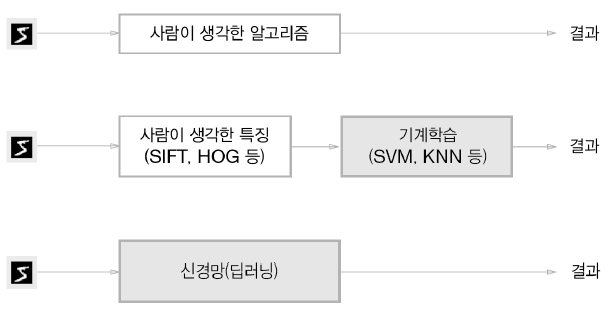


- 규칙을 '사람'이 만드는 방식 > '기계'가 데이터로부터 규칙(특성)을 발견해 내는 방식으로 패러다임 전환 

#### 신경망의 이점
- 모든 문제를 같은 맥락에서 풀 수 있다.
    - '5'를 인식하는 문제
    - '개'를 인식하는 문제
    - '사람 얼굴'을 인식하는 문제
    - 위 각각에 대해 특징(feature)를 별도로 지정할 필요 없음
  

#### 종단간 기계학습(end-to-end machine learning)
- 데이터(입력)에서 목표한 결과(출력)를 사람의 개입 없이 얻는다

### 4.1.2 훈련 데이터와 시험 데이터

#### 훈련 데이터(training data)와 시험 데이터(test data)로 나누는 이유?
- 범용적으로 사용할 수 있는 모델 필요 : 범용 능력을 제대로 평가하기 위해
    - 어떤 입력이 주어져도 처리 할 수 있는 신경망을 만들기 위해서
    - 훈련 데이터만으로만 신경망을 구축하면 훈련 데이터에 특화된 신경망이 만들어진다
    - 훈련 데이터를 가지고 가중치를 얻어내고 시험 데이터를 통해 검증
- 범용(=일반적) 능력
    - 생소한 데이터로도 문제를 올바르게 해결하는 능력
    - 손글씨 숫자 인식
        - ‘특정인’의 ‘특정 글자’가 아닌 ‘일반인’의 ‘일반 글자’를 인식하는 능력
- 오버피팅(과적합, overfitting)
    - 특정 데이터 셋에 지나치게 최적화된 상태    

## 4.2 손실 함수(비용 함수, lost function, cost function)

### 손실 함수
- 신경망에서 최적의 매개변수 값을 탐색하는 '하나의 지표'
- 신경망 성능의 '나쁨'을 나타내는 지표 : 성능의 '나쁨'을 최소화 = 성능의 '좋음'을 최대화
- 평균 제곱 오차
- 교차 엔트로피 오자

### 4.2.1 평균 제곱 오차(Mean Squared Error, MSE)

\begin{align}
E = \frac{1}{2^{n}} {\sum_{k}^{n}(y_{k} - t_{k})^{2}} \\
y_{k} : 신경망의 출력(신경망이 추정한 값)\\
t_{k} : 정답 레이블 \\
k : 데이터의 차원 수 \\
\end{align}


- 오차에 대한 2차 방정식

In [1]:
import numpy as np

In [2]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [3]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [4]:
# 예1: '2'일 획률이 가장 높다고 추정
y = [0.1, 0.05, 0.7, 0.0, 0.05, 0.05, 0.0, 0.05, 0.0, 0.0]

In [5]:
mean_squared_error(np.array(y), np.array(t))

0.055000000000000014

In [6]:
# 예1: '7'일 획률이 가장 높다고 추정
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

In [7]:
mean_squared_error(np.array(y), np.array(t))

0.59750000000000003

### 4.2.2 교차 엔트로피 오차(Cross Entropy Error, CEE)

\begin{equation*}
    E = -\sum_{k}t_{k}log{y_{k}} \\
    y_{k} : 신경망의 출력(신경망이 추정한 값)\\
    t_{k} : 정답 레이블 \\
    k : 데이터의 차원 수 \\
\end{equation*}


- 2개의 확률 분포 사이에서 정의되는 척도 : 정보 엔트로피와 닮은 꼴
- t_k가 원-핫 인코딩이라면 정답일 떄의 추정값의 자연로그를 계산하는 식


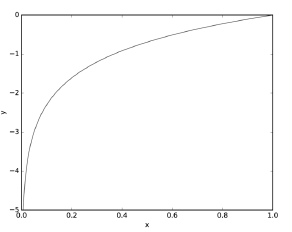

- log graph

In [8]:
import numpy as np

In [9]:
def cross_entropy_error(y, t): # y는 예측값, t는 실제 값
    delta = 1e-7
    return -(np.sum(t * np.log(y + delta)))

In [10]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [11]:
# 예1: '2'일 획률이 가장 높다고 추정
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.05, 0.0, 0.05, 0.0, 0.0]

In [12]:
cross_entropy_error(np.array(y), np.array(t))

0.51082545709933802

In [13]:
# 예1: '2'일 획률이 더 높은 경우
y = [0.1, 0.05, 0.7, 0.0, 0.05, 0.05, 0.0, 0.05, 0.0, 0.0]

In [14]:
cross_entropy_error(np.array(y), np.array(t))

0.35667480108159988

In [15]:
# 예1: '7'일 획률이 가장 높다고 추정
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]

In [16]:
cross_entropy_error(np.array(y), np.array(t))

2.3025840929945458

### 4.2.3 미니 배치 학습

- 훈련 데이터 모두에 대한 손실 함수 CEE의 합
\begin{align}
E = -\frac{1}{N} {\sum_{n}{\sum_{k}t_{nk}log{y_{nk}}}}
\end{align}
- 평균을 구한다는 것은 훈련 데이터 개수와 관계없이 언제든 통일된 지표를 다룬다는 것
- 빅데이터 시대 : 모든 데이터에 대해 손실함수 값을 구한다는 건 아주 시간이 많이 걸림
- 미니 배치(mini-batch) 학습
    - 훈련 데이터 전체가 아닌 일부만 골라서 학습 : np.random.choice()
    - 전체 데이터에서 무작위로 추출한 표본 > 전체 데이터를 잘 대표

#### 임의의 훈련 데이터 또는 시험 데이터 뽑기
- numpy.random.choice()

In [17]:
np.random.choice(1000, 10)

array([940, 307, 531, 922, 597, 532, 665, 439,  54, 397])

In [18]:
np.random.choice(10, 5)

array([6, 0, 3, 7, 4])

In [19]:
import sys
import os
sys.path.append(os.pardir)

from dataset.mnist import load_mnist

In [20]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

In [21]:
print(x_train.shape)

(60000, 784)


In [22]:
train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
print(batch_mask)

[26103 32252 12868 38011 25226 28818 28358 30559 25750  9131]


In [23]:
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]

In [24]:
print(x_batch[0])
print(t_batch[0])

[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.

### 4.2.4 (배치용) 교차 엔트로피 오차

#### 정답 레이블이 원-핫 인코딩인 경우

In [25]:
pwd

'C:\\pydev\\deep-learning-from-scratch-master\\deep-learning-from-scratch-master'

In [26]:
%cd CH03

C:\pydev\deep-learning-from-scratch-master\deep-learning-from-scratch-master\CH03


In [27]:
import numpy as np
import neuralnet_mnist

Accuracy:0.9352


In [28]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    
    batch_size = y.shape[0]
    
    return -np.sum(t * np.log(y))/ batch_size

In [29]:
network = neuralnet_mnist.init_network()
print(network)

{'b2': array([-0.01471108, -0.07215131, -0.00155692,  0.12199665,  0.11603302,
       -0.00754946,  0.04085451, -0.08496164,  0.02898045,  0.0199724 ,
        0.19770803,  0.04365116, -0.06518728, -0.05226324,  0.0113163 ,
        0.03049979,  0.04060355,  0.0695399 , -0.07778469,  0.0692313 ,
       -0.09365533,  0.0548001 , -0.03843745,  0.02123107,  0.03793406,
       -0.02806267, -0.01818407,  0.06870425,  0.0542943 ,  0.0674368 ,
        0.06264312, -0.0233236 , -0.01589135,  0.01860516,  0.01839287,
       -0.01568104, -0.07422207, -0.01606729, -0.02262172, -0.01007509,
        0.0434415 , -0.12020151,  0.02802471, -0.07591944, -0.00533499,
       -0.08935217, -0.0181419 ,  0.0330689 , -0.01812706, -0.07689384,
       -0.02715412, -0.03847084, -0.05315471, -0.02153288,  0.06898243,
        0.02431128, -0.00333816,  0.00817491,  0.03911701, -0.02924617,
        0.07184725, -0.00356748,  0.02246175,  0.03987982, -0.04921926,
        0.02454282,  0.05875788,  0.08505439, -0.00190306

In [30]:
y = neuralnet_mnist.predict(network, x_batch)

In [31]:
print(y)
print(t_batch)

[[  9.98252451e-01   4.79893902e-09   3.43259890e-04   1.64667581e-05
    2.29585964e-07   1.30054122e-03   7.25567661e-05   5.46375941e-06
    7.87015506e-06   1.17624438e-06]
 [  1.83276046e-04   1.20117204e-06   2.23272928e-05   1.25490405e-04
    3.00048996e-04   5.16937289e-04   4.67289453e-07   9.89054799e-01
    1.01537789e-05   9.78541560e-03]
 [  1.36688410e-04   2.49712379e-04   1.44040998e-04   3.66874645e-03
    9.65302512e-02   9.20729861e-02   3.20561841e-04   7.46772299e-03
    1.43837566e-02   7.85025477e-01]
 [  2.31194872e-06   3.63445288e-04   1.58926108e-04   2.41617759e-04
    9.84163225e-01   3.11758206e-03   5.15009230e-03   5.27098426e-04
    1.70176628e-03   4.57384298e-03]
 [  1.65640179e-03   2.44729085e-06   5.79591561e-03   4.35872107e-06
    4.91552986e-04   8.79208092e-04   9.91127968e-01   9.07192714e-07
    4.05692299e-05   5.59317357e-07]
 [  9.54916894e-01   8.06005403e-07   3.15231690e-03   5.16537053e-04
    2.22232939e-05   3.97420526e-02   3.96304

In [32]:
cross_entropy_error(y, t_batch)

0.037861546361818911

#### 정답 레이블이 ‘2’, ‘7’ 과 같은 숫자 레이블로 주어진 경우

In [33]:
y = np.arange(30).reshape(3, 10)
print(y)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]


In [34]:
t = np.array([3, 7, 1])
print(t)

[3 7 1]


In [35]:
batch_size = y.shape[0]
print(batch_size)

3


In [36]:
y[np.arange(batch_size), t]

array([ 3, 17, 21])

#### 정답 레이블이 원-핫 인코딩이든 숫자 레이블이든 무관
- 원-핫 인코딩을 숫자 레이블로 변환

In [37]:
a = np.array(range(10))

In [38]:
b = a.reshape(5, 2)
b

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

### 4.2.5 손실 함수를 설정하는 이유
- 손실 함수 vs 정확도


- 가중치 매개변수에 대한 손실 함수의 미분
    - 가중치 매개변수의 값을 아주 조금씩 변화시칼 때, 손실 함수가 어떻게 변하나
    - 손실 함수 값줄이기
        - 미분 값이 음수  해당 가중치 매개변수를 양의 방향으로 변화
        - 미분 값이 양수  해당 가중치 매개변수를 음의 방향으로 변화
        - 미분 값이 0  해당 가중치 매개변수 갱신 중단
        

- 신경망 학습 시 정확도를 지표로 삼아선 안 된다
    - 정확도에 대한 매개변수의 미분이 대부분의 장소에서 0이 되기 때문
    - 가중치를 조금 변화시켜도 정확도는 거의 그대로이므로
    - 계단 함수를 활성화 함수로 사용하지 않는 이유와도 일맥상통

#### 계단 함수와 시그모이드 함수
- 계단 함수 : 대부분의 장소에서 기울이가 0
- 시그모이드 함수 : 어느 장소라도 기울기가 0이 아님


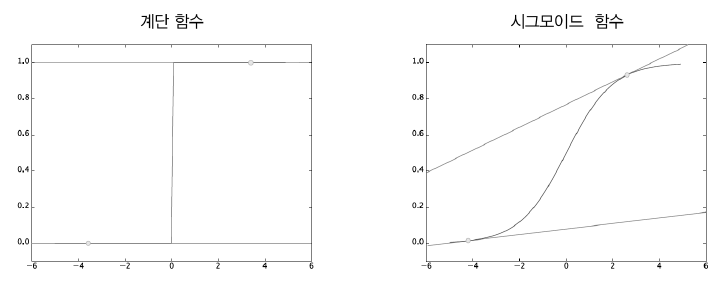

## 4.3 수치 미분

### 4.3.1 미분 
- '평균 변화량'이 아닌 '순간 변화량'


\begin{align}
\frac{df(x)}{dx} = \lim_{h -> 0}{\frac{f(x + h) - f(x)}{h}}
\end{align}


- x의 '작은 변화'가 함수 f(x)를 얼마나 변화시키느냐
- 파이썬으로 수치 미분 구현

In [39]:
def numerical_diff(f, x):
    h = 1e-50
    return (f(x+h) - f(x)) / h

- 두 가지 문제점
    - 반올림 오차(rounding error)
        - 원인 : 너무 작은 값
        - 해결책 : h의 값으로 1e-4사용
    - 함수의 차분과 기울기 간의 간극
        - 원인 : 전방 차분
        - 해결책 : 중앙 차분(x를 중심으로 x-h, x+h)
        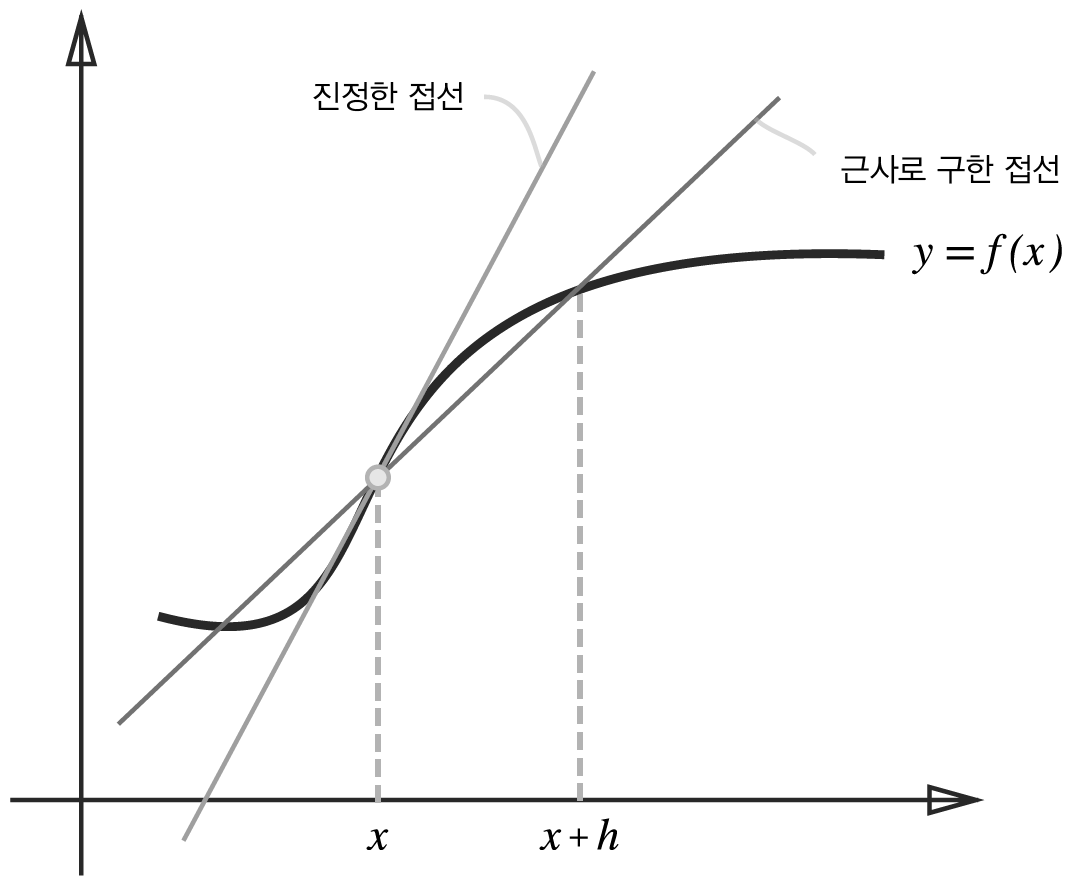

In [40]:
# 반올림 오차
print(1e-50)
print(type(1e-50))
print(np.float32(1e-50))

1e-50
<class 'float'>
0.0


#### 개선된 파이썬 수치 미분 코드

In [41]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

### 4.3.2 수치 미분의 예
- gradient_1d.py 참고


\begin{align}
y = 0.01x^{2} + 0.1x \\
y' = 0.02x + 0.1
\end{align}


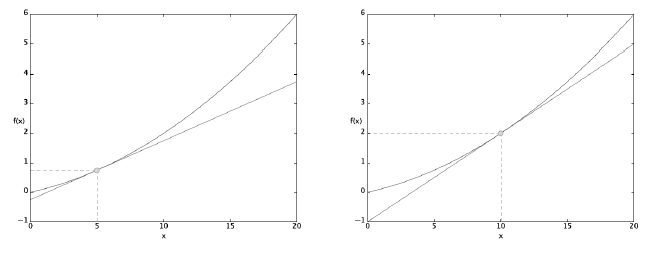

In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [43]:
def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

In [44]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

In [45]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

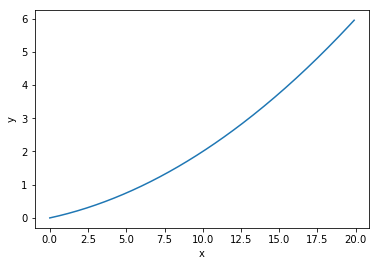

In [46]:
plt.xlabel('x')
plt.ylabel('y')
plt.plot(x, y)

In [47]:
numerical_diff(function_1, 5)

0.1999999999990898

In [48]:
def tangent_line(f, x):
    a = numerical_diff(f, x)
    print(a)
    b = f(x) - a*x
    return lambda t: a*t + b

In [49]:
#tangent_line이 return 해주는 값은 lambda 함수
tangent = tangent_line(function_1, 5)
tl = tangent(x)

0.1999999999990898


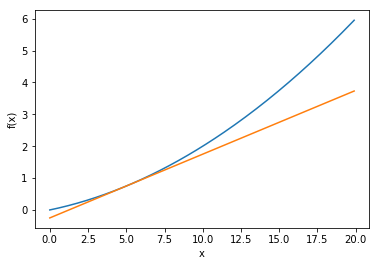

In [50]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.plot(x, tl)

In [51]:
def numerical_diff_1(f, x):
    h = 100000 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)

In [52]:
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)

In [53]:
def tangent_line_1(f, x):
    a = numerical_diff_1(f, x)
    print(a)
    b = f(x) - a*x
    return lambda t: a*t + b

In [54]:
#tangent_line이 return 해주는 값은 lambda 함수
tangent = tangent_line_1(function_1, 5)
tl = tangent(x)

0.2


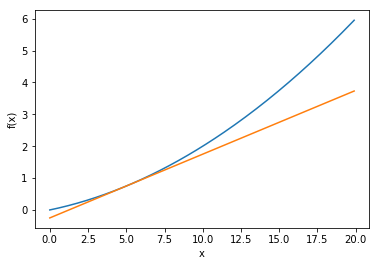

In [55]:
plt.xlabel('x')
plt.ylabel('f(x)')
plt.plot(x, y)
plt.plot(x, tl)

### 4.3.3 편미분
- 변수가 2개 이상


\begin{align}
f(x_0, x_1) = x_0^2 + x_1^2\\
\end{align}


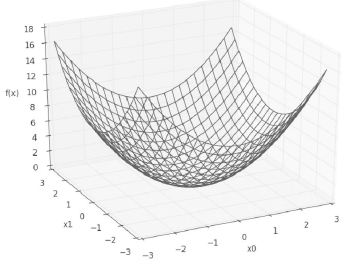

## 4.4 기울기

- 모든 변수의 편미분을 벡터로 정리한 것


\begin{align}
(\frac{\partial f}{\partial{x_0}}, \frac{\partial f}{\partial{x_1}})
\end{align}

#### cf. enumerate

In [56]:
for idx, x in enumerate(['a', 'b', 'c']):
    print(idx, x)

0 a
1 b
2 c


- !기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향!
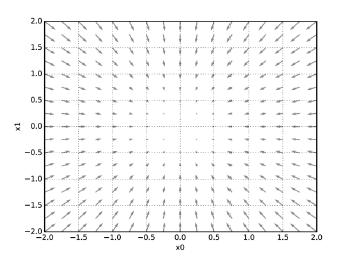

In [57]:
pwd

'C:\\pydev\\deep-learning-from-scratch-master\\deep-learning-from-scratch-master\\CH03'

In [61]:
%cd CH04

C:\pydev\deep-learning-from-scratch-master\deep-learning-from-scratch-master\CH04


In [62]:
import importlib
import gradient_2d

In [63]:
importlib.reload(gradient_2d)

<module 'gradient_2d' from 'C:\\pydev\\deep-learning-from-scratch-master\\deep-learning-from-scratch-master\\CH04\\gradient_2d.py'>

C:\ProgramData\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


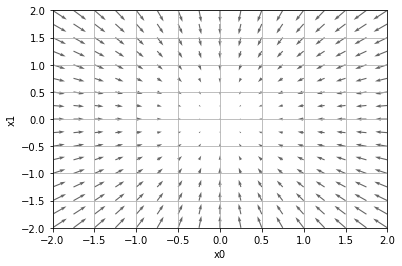

In [64]:
%run gradient_2d

### 4.4.1 경사법(경사 하강법)
- 기울기를 이용, 합수의 최솟값을 찾으려는 방법
    - 기울기가 0인 지점 : 최솟값, 극솟값, 안장점(saddle point)
    
    
- 경사 하강법(Gradient Descent)
    - 목적 함수(손실 함수, 비용 함수)를 정의하고 함수의 값이 최소화되는 파라미터를 찾는 방법
    - 함수의 최소값을 찾기 위해 현재 위치(보통 임의의 위치)에서 시작해서 기울기를 따라 조금씩 더 낮은 위치로 내려갑니다. 
    - 학습률
    \begin{align}
    x_0 = x_0 - \eta{\frac{\partial f}{\partial{x_0}}} \\
    x_1 = x_1 - \eta{\frac{\partial f}{\partial{x_1}}}
    \end{align}

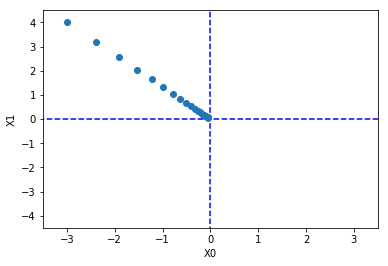

In [65]:
import gradient_method

#### 경사 하강법 예제
\begin{align}
f(x_0, x_1) = x_0^2 + x_1^2
\end{align}


- 경사법으로 최솟값을 구하라

In [66]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [67]:
init_x = np.array([-3.0, 4.0]) #참조 된 값이 넘어 간다.
result,_ = gradient_method.gradient_descent(function_2, init_x, lr=0.1, step_num=100)

result

array([ -6.11110793e-10,   8.14814391e-10])

#### 학습률이 너무 큰 예

In [70]:
result,_ = gradient_method.gradient_descent(function_2, init_x, lr=10.0, step_num=100)

result

array([ -2.58983747e+13,  -1.29524862e+12])

#### 학습률이 너무 작은 예

In [71]:
result,_ = gradient_method.gradient_descent(function_2, init_x, lr=1e-10, step_num=100)

result

array([-2.99999994,  3.99999992])

#### cf.파이썬 리스트 복사

In [ ]:
a = [9, 2, 1, 4]
b = a
print(a, b)

In [ ]:
b[0] = 999
print(a, b)

In [ ]:
c = a[:]
d = list(a)
print(c is a)
print(d is a)
print(b is a)

In [ ]:
a = [1, 2, ['a', 'b'], 3]
c = a[:]
print(c is a)

In [ ]:
a[2][1] = 'xyz'
print(a, c)

In [ ]:
import copy

In [ ]:
d = copy.deepcopy(a)

In [ ]:
a[2][0] = 'abc'
print(a)
print(c)
print(d)

In [ ]:
a[0] = 111
print(a)
print(c)
print(d)

In [ ]:
def func_a(x):
    my_x = x
    print(my_x)
    my_x = 100
    return my_x

In [ ]:
x = 20
func_a(x)

In [ ]:
print(x)

In [ ]:
def func_a(x):
    x[0] = 0
    return x[0]

In [ ]:
a = [1, 2, 3]

In [ ]:
func_a(a)

In [ ]:
print(a)

In [ ]:
b = (1, 2, 3)
func_a(b)
# 튜플은 값을 바꿀 수 없기 때문에 에러

#### cf. numpy array 객체 복사

In [ ]:
a = np.array([1, 2, 3, 4])

In [ ]:
b = a
print(b is a)

In [ ]:
c = a[:]
print(c is a)

c[0] = 111
print(c)
print(a)

# array객체를 새로 만들지만 array객체 안의 값은 참조된 값이다.

In [ ]:
d = np.array(a)
print(d is a)

d[1] = 222
print(d)
print(a)

In [ ]:
e = a.copy()
print(e is a)

e[2] = 333
print(e)
print(a)

In [ ]:
def func_a(x):
    x[0] = 777
    return

In [ ]:
func_a(a)
# 참조된 값이 넘어간다

In [ ]:
print(a)

#### 하이퍼파라미터
- Hyper parameter, 초매개변수


- 가중치, 바이어스와는 다른 성질
- 사람이 직접 설정해야 하는 파라미터
- 여러 후보 값 중에서 시험을 통해 가장 적합한 값을 찾는 과정 필요

### 4.4.2 신경망에서의 기울기

- 가중치 매개변수에 대한 손실 함수의 기울기
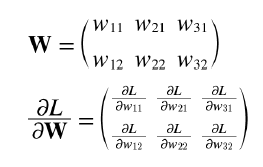


- 위 두 식의 형상이 같다
- CH04/gradient_simplenet.py의 simpleNet 클래스
- 손실 함수의 기울기에 대한 의미를 이해하자

In [76]:
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient

In [77]:
class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3) # 정규분포로 초기화

    def predict(self, x):
        return np.dot(x, self.W)

    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z)
        loss = cross_entropy_error(y, t)

        return loss

In [78]:
x = np.array([0.6, 0.9])
t = np.array([0, 0, 1])

In [79]:
net = simpleNet()

In [80]:
f = lambda w: net.loss(x, t) # helper func
dW = numerical_gradient(f, net.W) # 수치해석적으로 기울기를 계산

In [81]:
print(dW)

[[ 0.37439085  0.09282002 -0.46721087]
 [ 0.56158627  0.13923003 -0.7008163 ]]


In [83]:
import gradient_simplenet

[[ 0.00717515  0.04746715 -0.0546423 ]
 [ 0.01076273  0.07120072 -0.08196345]]


## 4.5 학습 알고리즘 구현하기

#### 신경망 학습 절차 : SGD 사용


- 전체 : 신경망에는 적응 가능한 가중치와 편향(바이어스)가 존재
- 가중치와 바이어스를 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라 한다.
- 신경망은 다음과 같은 4단계로 수행


1. 미니배치
    - 훈련 데이터 중 일부를 **무작위**로 가져온다.
    - 선별된 데이터를 미니 배치한다.
    - 미니 배치의 손실 함수 값을 줄이는 것이 목표
2. 기울기 산출
    - 미니 배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다.
    - 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시
3. 매개변수 갱신
    - 가중치 매개변수를 기울기 방향으로 아주 조금 갱신
4. 1 ~ 3 반복

#### 2층 신경망에 대해 MNIST 데이터셋을 학습하도록 구현


- 2층 신경망 클래스 구현 : ch04/two_layer_net.py 코드 참조


- 미니 배치 학습 구현하기
    - ch04/train_neuralnet.py 코드 참조
    - 매번 60,000개의 훈련 데이터에서 임의로 100개의 데이터를 추려냄
    - 100개의 데이터에 대해 SGD를 수행하여 매개변수 갱신
    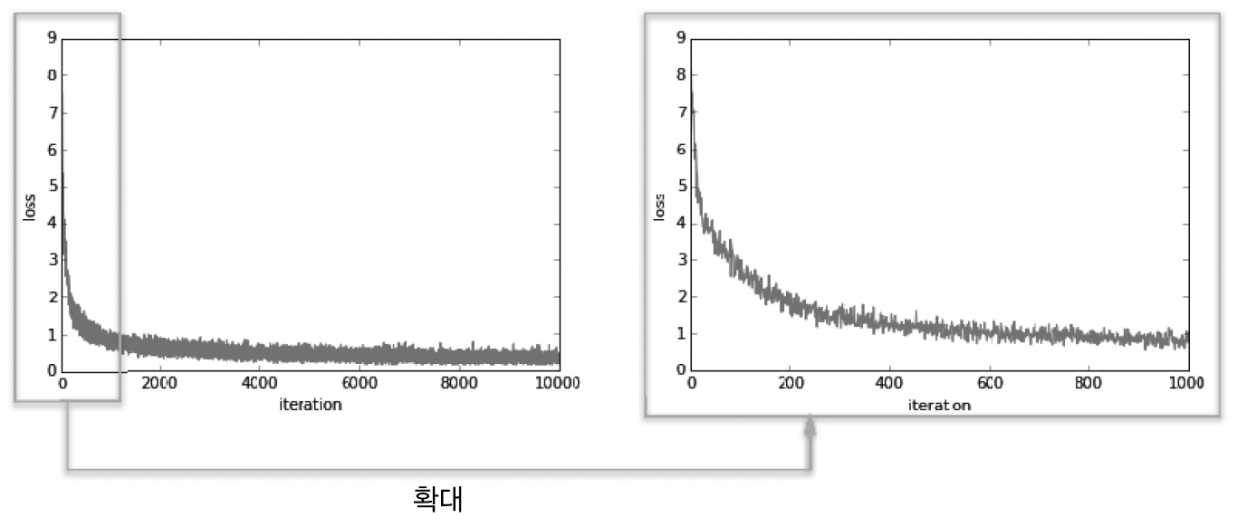

#### 2층 신경망에 대해 MNIST 데이터셋을 학습하도록 구현


- 시험 데이터로 평가하기
    - 훈련 데이터의 손실 함수 값이 작아진다.  학습이 잘 되고 있다
    - 오버피팅 여부 확인
    - 에폭(epoch)별로 훈련 데이터와 시험 데이터에 대한 정확도 기록
        – 1 epoch: 학습 데이터를 전부 소진했을 때의 학습 데이터 수
        
        
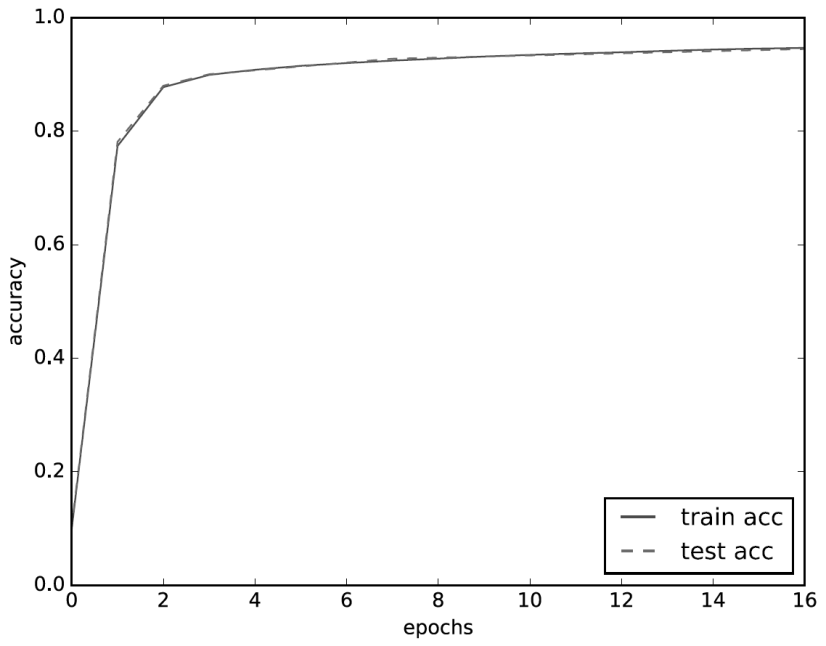

train acc, test acc | 0.112366666667, 0.1135
train acc, test acc | 0.804733333333, 0.8074
train acc, test acc | 0.881866666667, 0.8853
train acc, test acc | 0.899866666667, 0.9017
train acc, test acc | 0.908516666667, 0.9102
train acc, test acc | 0.9141, 0.9154
train acc, test acc | 0.918983333333, 0.9221
train acc, test acc | 0.924066666667, 0.9263
train acc, test acc | 0.92795, 0.93
train acc, test acc | 0.929833333333, 0.9307
train acc, test acc | 0.934216666667, 0.9359
train acc, test acc | 0.936416666667, 0.9377
train acc, test acc | 0.939366666667, 0.9404
train acc, test acc | 0.941433333333, 0.9413
train acc, test acc | 0.943633333333, 0.9426
train acc, test acc | 0.945083333333, 0.9444
train acc, test acc | 0.947733333333, 0.9467


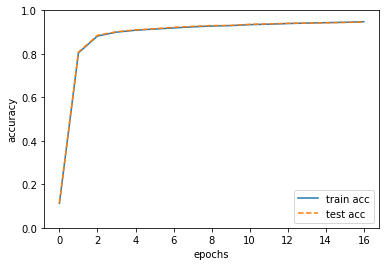

In [84]:
import train_neuralnet

In [85]:
train_neuralnet.network.params

{'W1': array([[ 0.02416051, -0.01017222,  0.00054848, ..., -0.0002564 ,
         -0.00535067, -0.00679543],
        [ 0.00034094, -0.00065592,  0.00385391, ...,  0.01355692,
         -0.00361909, -0.00342185],
        [ 0.00088991, -0.00059682, -0.00824441, ...,  0.01078753,
         -0.0101574 , -0.01599949],
        ..., 
        [-0.00251509, -0.00152124,  0.00257998, ..., -0.00971831,
         -0.00728573,  0.00854456],
        [ 0.01324909, -0.00903412, -0.01220731, ..., -0.01836764,
         -0.01329321, -0.00214157],
        [ 0.00084762,  0.00761069,  0.02073439, ...,  0.00414356,
          0.02390536,  0.00625161]]),
 'W2': array([[ -6.13532004e-01,   9.60189395e-01,  -1.14666738e+00,
           1.09645434e+00,  -1.05890936e+00,  -4.45484930e-01,
          -1.03819762e+00,   1.19566033e+00,  -3.97367276e-01,
           1.45299728e+00],
        [ -6.82571396e-01,  -7.61664997e-01,   9.31194247e-01,
          -4.44551081e-01,   9.82047050e-01,  -1.03548192e+00,
           2.6282